In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import random
import cv2
import PIL
import glob
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [6]:
ROOTPATH = 'E:/AThesis/Final'
DATAPATH= ROOTPATH+'/training_set'
TRAINPATH = ROOTPATH+'/training_set'
TESTPATH =  ROOTPATH+'/testing_set'
MODELPATH = ROOTPATH+'/model'

In [7]:
two=glob.glob(DATAPATH+'/1.two/*.*')
five=glob.glob(DATAPATH+'/2.five/*.*')
ten=glob.glob(DATAPATH+'/3.ten/*.*')
twenty=glob.glob(DATAPATH+'/4.twenty/*.*')
fifty=glob.glob(DATAPATH+'/5.fifty/*.*')
one_hundred=glob.glob(DATAPATH+'/6.one_hundred/*.*')
two_hundred=glob.glob(DATAPATH+'/7.two_hundred/*.*')
five_hundred=glob.glob(DATAPATH+'/8.five_hundred/*.*')
one_thousand=glob.glob(DATAPATH+'/9.one_thousand/*.*')

In [8]:
print('two: ',len(two))
print('five : ',len(five))
print('ten: ',len(ten))
print('twenty: ',len(twenty))
print('fifty: ',len(fifty))
print('one_hundred: ',len(one_hundred))
print('two_hundred: ',len(two_hundred))
print('five_hundred: ',len(five_hundred))
print('one_thousand: ',len(one_thousand))

two:  600
five :  600
ten:  600
twenty:  600
fifty:  600
one_hundred:  600
two_hundred:  600
five_hundred:  600
one_thousand:  600


In [9]:
dataset_classes=[two,five,ten,twenty,fifty,one_hundred,two_hundred,five_hundred,one_thousand]
total_class=len(dataset_classes)
print('Total dataset class: ',total_class)

Total dataset class:  9


In [10]:
IMAGE_SIZE=224
BATCH_SIZE=64

#pre_processing_training
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest',
        validation_split=0.2)

training_set = train_datagen.flow_from_directory(
        DATAPATH,
        shuffle=True,
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=BATCH_SIZE,
        class_mode='categorical',
        subset='training')


validation_set = train_datagen.flow_from_directory(
        DATAPATH,
         shuffle=True,
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=BATCH_SIZE,
        class_mode='categorical',
        subset='validation')

Found 4320 images belonging to 9 classes.
Found 1080 images belonging to 9 classes.


In [11]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_set = test_datagen.flow_from_directory(
        TESTPATH,
         shuffle=False,
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=BATCH_SIZE,
        class_mode='categorical')

Found 575 images belonging to 9 classes.


In [43]:
training_set.class_indices

{'1.two': 0,
 '2.five': 1,
 '3.ten': 2,
 '4.twenty': 3,
 '5.fifty': 4,
 '6.one_hundred': 5,
 '7.two_hundred': 6,
 '8.five_hundred': 7,
 '9.one_thousand': 8}

In [44]:
validation_set.class_indices

{'1.two': 0,
 '2.five': 1,
 '3.ten': 2,
 '4.twenty': 3,
 '5.fifty': 4,
 '6.one_hundred': 5,
 '7.two_hundred': 6,
 '8.five_hundred': 7,
 '9.one_thousand': 8}

In [45]:
test_set.class_indices

{'1.two': 0,
 '2.five': 1,
 '3.ten': 2,
 '4.twenty': 3,
 '5.fifty': 4,
 '6.one_hundred': 5,
 '7.two_hundred': 6,
 '8.five_hundred': 7,
 '9.one_thousand': 8}

In [46]:
total_class=len(training_set.class_indices)
print('Number of classes in dataset: ',total_class)

Number of classes in dataset:  9


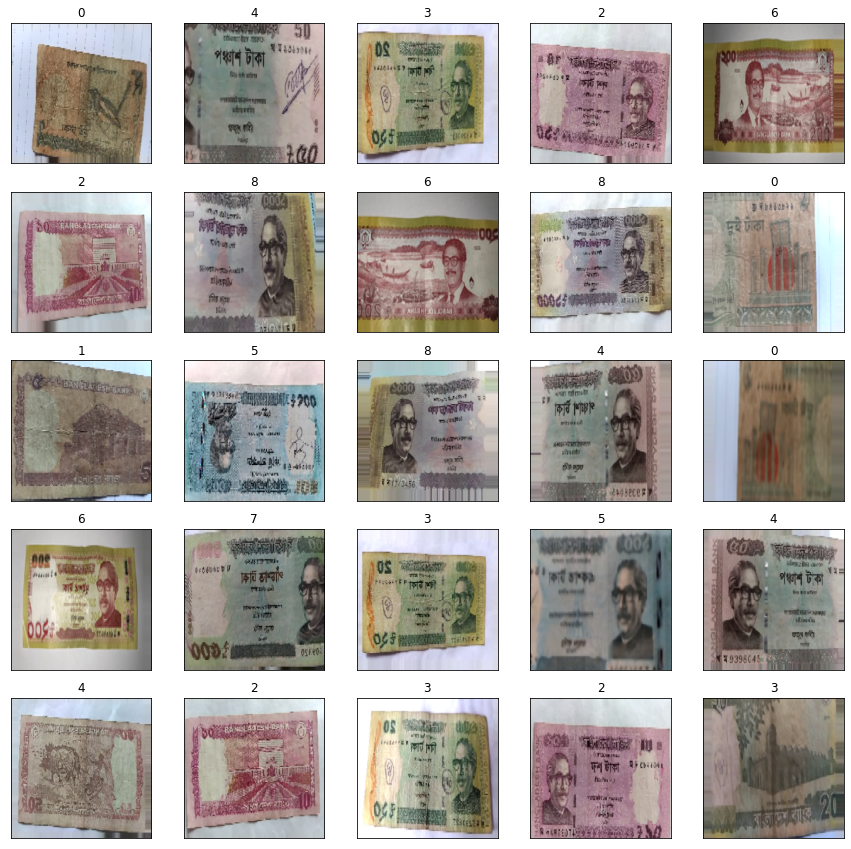

In [47]:
x,y=training_set.next()
fig=plt.figure(figsize=(15,15))
rows=5
cols=5
for i in range(rows*cols):
    fig.add_subplot(rows,cols,i+1)
    image=x[i]
    plt.imshow(image)
    plt.title(np.argmax(y[i]))
    plt.xticks([])
    plt.yticks([])
    
plt.show()

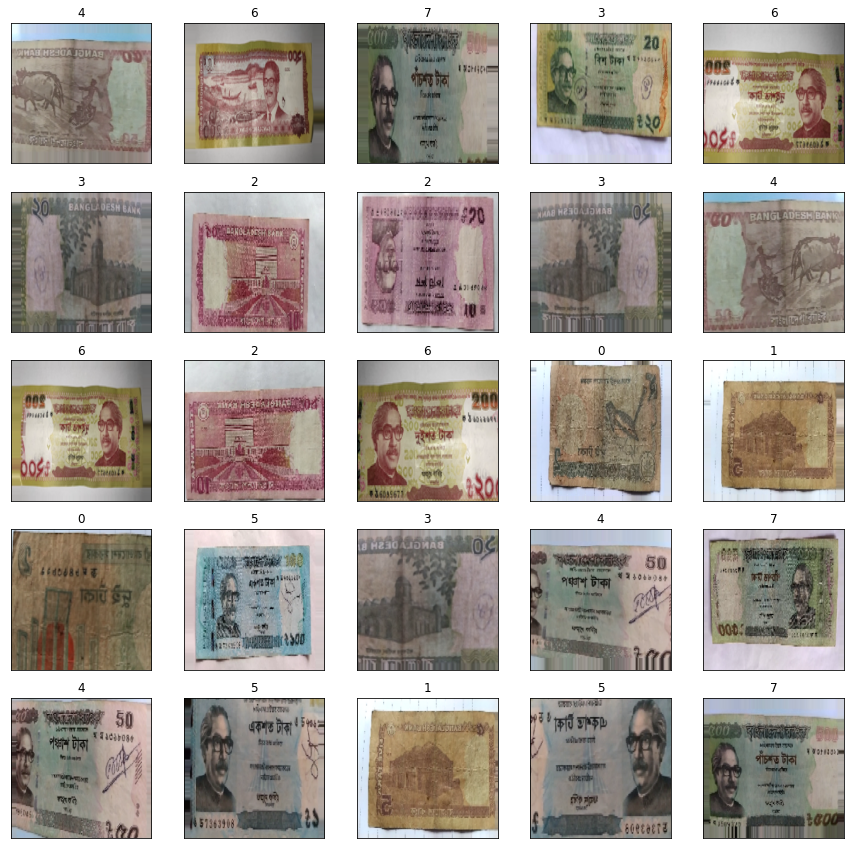

In [48]:
x,y=validation_set.next()
fig=plt.figure(figsize=(15,15))
rows=5
cols=5
for i in range(rows*cols):
    fig.add_subplot(rows,cols,i+1)
    image=x[i]
    plt.imshow(image)
    plt.title(np.argmax(y[i]))
    plt.xticks([])
    plt.yticks([])
    
plt.show()

In [49]:
cnn = tf.keras.models.Sequential()

cnn.add(tf.keras.layers.Conv2D(filters=64 , kernel_size=3 , strides=2, activation='relu' , input_shape=[224,224,3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=32 , kernel_size=3 , strides=2, activation='relu' ))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2 , strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=32 , kernel_size=3 , strides=2, activation='relu' ))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))

cnn.add(tf.keras.layers.Dropout(0.5))

cnn.add(tf.keras.layers.Flatten())

cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))
cnn.add(tf.keras.layers.Dense(units=9 , activation='softmax'))

In [50]:
cnn.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 111, 111, 64)      1792      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 55, 55, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 27, 27, 32)        18464     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 6, 6, 32)          9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 3, 3, 32)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 3, 3, 32)         

In [51]:
cnn.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

In [13]:
from tensorflow.keras.callbacks import ModelCheckpoint
checkpointer = ModelCheckpoint(filepath=MODELPATH+'CNN.model.best.hdf5', verbose=1 ,save_best_only=True)

In [53]:
history=cnn.fit(training_set,
                epochs=50,
                validation_data=validation_set,
                callbacks=[checkpointer])

Epoch 1/50
68/68 [==============================] - ETA: 0s - loss: 1.8678 - accuracy: 0.2764
Epoch 00001: val_loss improved from inf to 1.34729, saving model to E:/AThesis/Final\modelCNN.model.best.hdf5
68/68 [==============================] - 133s 2s/step - loss: 1.8678 - accuracy: 0.2764 - val_loss: 1.3473 - val_accuracy: 0.4963
Epoch 2/50
68/68 [==============================] - ETA: 0s - loss: 1.1597 - accuracy: 0.5412
Epoch 00002: val_loss improved from 1.34729 to 0.97768, saving model to E:/AThesis/Final\modelCNN.model.best.hdf5
68/68 [==============================] - 95s 1s/step - loss: 1.1597 - accuracy: 0.5412 - val_loss: 0.9777 - val_accuracy: 0.6241
Epoch 3/50
68/68 [==============================] - ETA: 0s - loss: 0.8093 - accuracy: 0.6914
Epoch 00003: val_loss improved from 0.97768 to 0.70609, saving model to E:/AThesis/Final\modelCNN.model.best.hdf5
68/68 [==============================] - 93s 1s/step - loss: 0.8093 - accuracy: 0.6914 - val_loss: 0.7061 - val_accuracy:

Epoch 28/50
68/68 [==============================] - ETA: 0s - loss: 0.0320 - accuracy: 0.9891
Epoch 00028: val_loss did not improve from 0.10838
68/68 [==============================] - 85s 1s/step - loss: 0.0320 - accuracy: 0.9891 - val_loss: 0.1573 - val_accuracy: 0.9343
Epoch 29/50
68/68 [==============================] - ETA: 0s - loss: 0.0328 - accuracy: 0.9891
Epoch 00029: val_loss did not improve from 0.10838
68/68 [==============================] - 89s 1s/step - loss: 0.0328 - accuracy: 0.9891 - val_loss: 0.1242 - val_accuracy: 0.9667
Epoch 30/50
68/68 [==============================] - ETA: 0s - loss: 0.0579 - accuracy: 0.9819
Epoch 00030: val_loss did not improve from 0.10838
68/68 [==============================] - 86s 1s/step - loss: 0.0579 - accuracy: 0.9819 - val_loss: 0.1794 - val_accuracy: 0.9361
Epoch 31/50
68/68 [==============================] - ETA: 0s - loss: 0.0474 - accuracy: 0.9854
Epoch 00031: val_loss did not improve from 0.10838
68/68 [======================

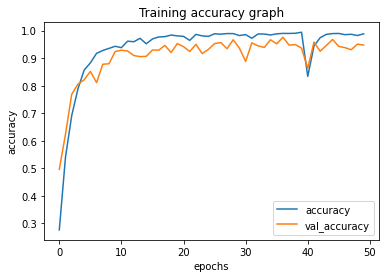

In [54]:
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Training accuracy graph')
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.legend()
plt.show()

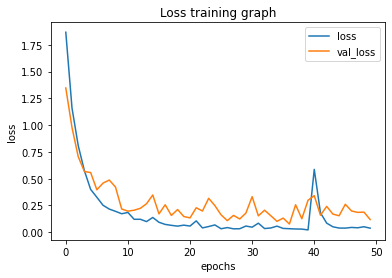

In [55]:
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Loss training graph')
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.legend()
plt.show()

In [57]:
test_loss,test_accuracy=cnn.evaluate(test_set)
print('Test Loss: ',test_loss)
print('Test Accuracy: ',test_accuracy)

9/9 [==============================] - 4s 443ms/step - loss: 0.0532 - accuracy: 0.9930
Test Loss:  0.05315159261226654
Test Accuracy:  0.9930434823036194


In [58]:
print('Accuracy of the model is : ',test_accuracy*100)

Accuracy of the model is :  99.30434823036194


In [9]:
from tensorflow.keras.preprocessing import image

(1, 224, 224, 3)
[[6.3850351e-02 5.9724522e-01 1.7589862e-02 2.5303252e-02 2.8287476e-01
  1.1402553e-04 1.6219749e-03 3.4318825e-03 7.9686660e-03]]
1


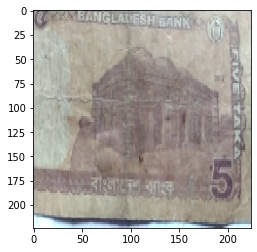

In [61]:
random_image=image.load_img('E:/AThesis/Final/testing_set/2.five/five14.png',target_size=(224,224))
plt.imshow(random_image)
random_image=image.img_to_array(random_image)
test_image=random_image.reshape((1,)+random_image.shape)
test_image=test_image/255.0
print(test_image.shape)
predicted_class=cnn.predict(test_image)
print(predicted_class)
#print('True classification')
print(np.argmax(predicted_class))

(1, 224, 224, 3)
[[5.2988948e-06 9.9958891e-01 5.0093631e-06 3.2802302e-06 3.9142670e-04
  2.0069998e-11 5.5963927e-09 1.9128530e-09 6.1164587e-06]]
1


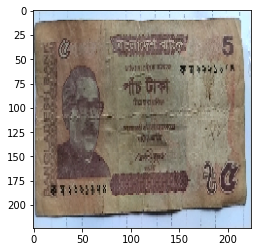

In [62]:
random_image=image.load_img('E:/AThesis/Final/testing_set/2.five/five60.png',target_size=(224,224))
plt.imshow(random_image)
random_image=image.img_to_array(random_image)
test_image=random_image.reshape((1,)+random_image.shape)
test_image=test_image/255.0
print(test_image.shape)
predicted_class=cnn.predict(test_image)
print(predicted_class)
#print('True classification')
print(np.argmax(predicted_class))

(1, 224, 224, 3)
[[1.3890960e-19 8.5891581e-16 1.0000000e+00 2.8400978e-30 8.9509961e-15
  2.1471345e-36 2.9047917e-20 2.4362828e-28 8.2050917e-16]]
2


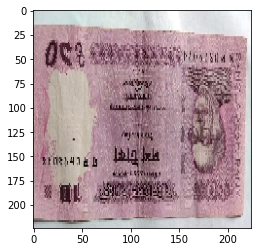

In [63]:
random_image=image.load_img('E:/AThesis/Final/testing_set/3.ten/ten1.png',target_size=(224,224))
plt.imshow(random_image)
random_image=image.img_to_array(random_image)
test_image=random_image.reshape((1,)+random_image.shape)
test_image=test_image/255.0
print(test_image.shape)
predicted_class=cnn.predict(test_image)
print(predicted_class)
#print('True classification')
print(np.argmax(predicted_class))

(1, 224, 224, 3)
[[1.4915247e-16 4.9723917e-15 1.0000000e+00 5.2450660e-37 7.3275447e-18
  0.0000000e+00 1.4027823e-14 3.2995920e-36 3.8252748e-20]]
2


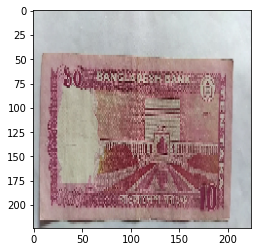

In [64]:
random_image=image.load_img('E:/AThesis/Final/testing_set/3.ten/ten46.png',target_size=(224,224))
plt.imshow(random_image)
random_image=image.img_to_array(random_image)
test_image=random_image.reshape((1,)+random_image.shape)
test_image=test_image/255.0
print(test_image.shape)
predicted_class=cnn.predict(test_image)
print(predicted_class)
#print('True classification')
print(np.argmax(predicted_class))

(1, 224, 224, 3)
[[9.4847110e-06 9.6378727e-09 2.4644403e-10 1.0409962e-02 9.8916805e-01
  2.7994116e-04 1.1015631e-13 1.3216384e-04 3.4298137e-07]]
4


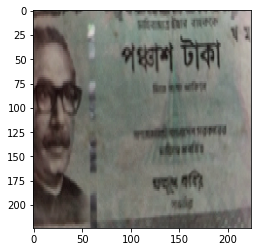

In [65]:
random_image=image.load_img('E:/AThesis/Final/testing_set/5.fifty/fifty31.png',target_size=(224,224))
plt.imshow(random_image)
random_image=image.img_to_array(random_image)
test_image=random_image.reshape((1,)+random_image.shape)
test_image=test_image/255.0
print(test_image.shape)
predicted_class=cnn.predict(test_image)
print(predicted_class)
#print('True classification')
print(np.argmax(predicted_class))

(1, 224, 224, 3)
[[6.2519810e-03 3.1152961e-01 5.2712519e-02 4.2459494e-04 6.2656140e-01
  1.2657561e-08 1.8925044e-03 1.7203911e-06 6.2571728e-04]]
4


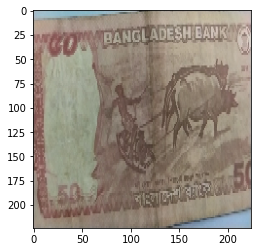

In [66]:
random_image=image.load_img('E:/AThesis/Final/testing_set/5.fifty/fifty34.png',target_size=(224,224))
plt.imshow(random_image)
random_image=image.img_to_array(random_image)
test_image=random_image.reshape((1,)+random_image.shape)
test_image=test_image/255.0
print(test_image.shape)
predicted_class=cnn.predict(test_image)
print(predicted_class)
#print('True classification')
print(np.argmax(predicted_class))

(1, 224, 224, 3)
[[1.1796794e-12 1.8351696e-09 4.0734741e-13 2.0745488e-23 8.4421903e-26
  3.7320704e-30 1.0000000e+00 2.4223531e-29 4.5037569e-14]]
6


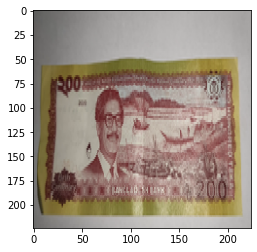

In [67]:
random_image=image.load_img('E:/AThesis/Final/testing_set/7.two_hundred/two_hundred23.png',target_size=(224,224))
plt.imshow(random_image)
random_image=image.img_to_array(random_image)
test_image=random_image.reshape((1,)+random_image.shape)
test_image=test_image/255.0
print(test_image.shape)
predicted_class=cnn.predict(test_image)
print(predicted_class)
#print('True classification')
print(np.argmax(predicted_class))

(1, 224, 224, 3)
[[2.3882727e-09 9.6277042e-11 1.0020620e-15 1.2989071e-17 1.4311336e-23
  7.8877580e-29 1.0000000e+00 4.1095657e-25 1.0671535e-15]]
6


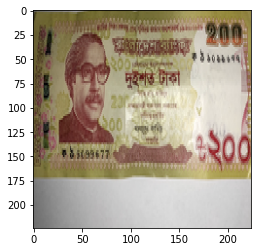

In [68]:
random_image=image.load_img('E:/AThesis/Final/testing_set/7.two_hundred/two_hundred47.png',target_size=(224,224))
plt.imshow(random_image)
random_image=image.img_to_array(random_image)
test_image=random_image.reshape((1,)+random_image.shape)
test_image=test_image/255.0
print(test_image.shape)
predicted_class=cnn.predict(test_image)
print(predicted_class)
#print('True classification')
print(np.argmax(predicted_class))

(1, 224, 224, 3)
[[2.9282732e-04 9.6326112e-06 5.3921781e-06 8.7320399e-01 2.7585240e-02
  2.7870867e-02 2.5835103e-09 6.9560297e-02 1.4718169e-03]]
3


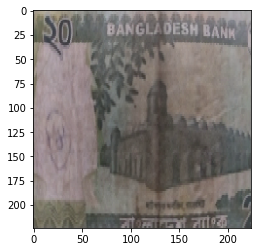

In [69]:
random_image=image.load_img('E:/AThesis/Final/testing_set/4.twenty/twenty38.png',target_size=(224,224))
plt.imshow(random_image)
random_image=image.img_to_array(random_image)
test_image=random_image.reshape((1,)+random_image.shape)
test_image=test_image/255.0
print(test_image.shape)
predicted_class=cnn.predict(test_image)
print(predicted_class)
#print('True classification')
print(np.argmax(predicted_class))

(1, 224, 224, 3)
[[1.2818569e-07 1.0103934e-12 1.1562246e-13 9.5209813e-01 1.0926731e-06
  4.2478111e-02 4.0252005e-15 5.4223207e-03 2.7785347e-07]]
3


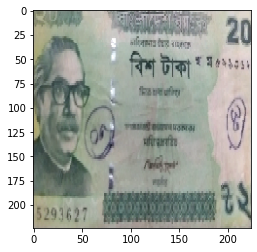

In [70]:
random_image=image.load_img('E:/AThesis/Final/testing_set/4.twenty/twenty5.png',target_size=(224,224))
plt.imshow(random_image)
random_image=image.img_to_array(random_image)
test_image=random_image.reshape((1,)+random_image.shape)
test_image=test_image/255.0
print(test_image.shape)
predicted_class=cnn.predict(test_image)
print(predicted_class)
#print('True classification')
print(np.argmax(predicted_class))

(1, 224, 224, 3)
[[5.6901605e-08 7.5056379e-09 4.0101211e-09 3.0962359e-03 2.4383586e-02
  3.2041458e-04 4.0090096e-14 9.7219163e-01 8.0804648e-06]]
7


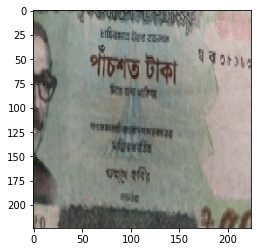

In [71]:
random_image=image.load_img('E:/AThesis/Final/testing_set/8.five_hundred/five_hundred31.png',target_size=(224,224))
plt.imshow(random_image)
random_image=image.img_to_array(random_image)
test_image=random_image.reshape((1,)+random_image.shape)
test_image=test_image/255.0
print(test_image.shape)
predicted_class=cnn.predict(test_image)
print(predicted_class)
#print('True classification')
print(np.argmax(predicted_class))

(1, 224, 224, 3)
[[9.9738802e-12 1.5246561e-20 7.0348515e-17 1.9666548e-05 1.0224529e-08
  6.9409563e-09 3.7186597e-19 9.9998033e-01 8.4053426e-15]]
7


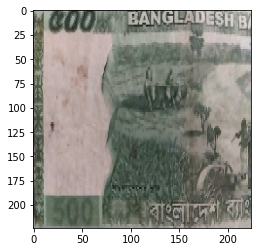

In [72]:
random_image=image.load_img('E:/AThesis/Final/testing_set/8.five_hundred/five_hundred70.png',target_size=(224,224))
plt.imshow(random_image)
random_image=image.img_to_array(random_image)
test_image=random_image.reshape((1,)+random_image.shape)
test_image=test_image/255.0
print(test_image.shape)
predicted_class=cnn.predict(test_image)
print(predicted_class)
#print('True classification')
print(np.argmax(predicted_class))

(1, 224, 224, 3)
[[9.9999666e-01 7.5968414e-09 3.0237745e-13 3.3804772e-06 6.2006438e-17
  7.7181594e-11 2.5271300e-08 1.4225322e-11 2.0552346e-09]]
0


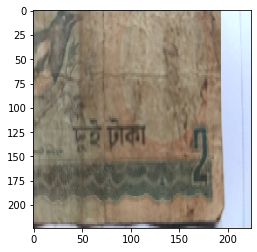

In [73]:
random_image=image.load_img('E:/AThesis/Final/testing_set/1.two/two1.png',target_size=(224,224))
plt.imshow(random_image)
random_image=image.img_to_array(random_image)
test_image=random_image.reshape((1,)+random_image.shape)
test_image=test_image/255.0
print(test_image.shape)
predicted_class=cnn.predict(test_image)
print(predicted_class)
#print('True classification')
print(np.argmax(predicted_class))

(1, 224, 224, 3)
[[9.9749571e-01 2.5042107e-03 1.4798995e-15 7.8012761e-12 1.7579399e-23
  1.6008482e-16 2.7194433e-09 2.0166833e-20 2.5193590e-11]]
0


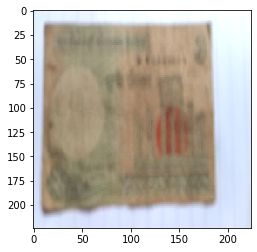

In [74]:
random_image=image.load_img('E:/AThesis/Final/testing_set/1.two/two44.png',target_size=(224,224))
plt.imshow(random_image)
random_image=image.img_to_array(random_image)
test_image=random_image.reshape((1,)+random_image.shape)
test_image=test_image/255.0
print(test_image.shape)
predicted_class=cnn.predict(test_image)
print(predicted_class)
#print('True classification')
print(np.argmax(predicted_class))

In [75]:
predicted_result=cnn.predict(test_set)
predicted_result[:5]

array([[9.99996662e-01, 7.59684138e-09, 3.02378050e-13, 3.38048358e-06,
        6.20066763e-17, 7.71815944e-11, 2.52712997e-08, 1.42253770e-11,
        2.05523065e-09],
       [9.99997497e-01, 9.96310021e-08, 6.09919884e-13, 2.33002220e-06,
        1.46108842e-16, 1.32817007e-10, 5.16852232e-08, 1.33406975e-11,
        2.82730062e-09],
       [9.99997616e-01, 1.20186655e-07, 6.52165550e-13, 2.22789299e-06,
        1.33621591e-16, 1.51852295e-10, 4.39076260e-08, 1.35542749e-11,
        3.13515880e-09],
       [9.99997616e-01, 1.10904175e-07, 6.80099531e-13, 2.29115949e-06,
        1.35992728e-16, 1.49651527e-10, 4.68570711e-08, 1.39318730e-11,
        3.04783065e-09],
       [9.97716308e-01, 7.75536697e-04, 1.49148338e-08, 1.49380160e-03,
        2.41415860e-10, 2.12838995e-06, 1.73948695e-06, 5.15187537e-08,
        1.03566890e-05]], dtype=float32)

In [76]:
predicted_class=np.argmax(predicted_result,axis=-1)
predicted_class[:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [77]:
test_classes=test_set.classes
test_classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,

In [78]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(test_classes,predicted_class)
print(cm)

[[72  0  0  0  0  0  0  0  0]
 [ 0 59  0  0  1  0  0  0  0]
 [ 0  0 60  0  0  0  0  0  0]
 [ 0  0  0 60  0  0  0  0  0]
 [ 0  3  0  0 57  0  0  0  0]
 [ 0  0  0  0  0 72  0  0  0]
 [ 0  0  0  0  0  0 47  0  0]
 [ 0  0  0  0  0  0  0 72  0]
 [ 0  0  0  0  0  0  0  0 72]]


<AxesSubplot:>

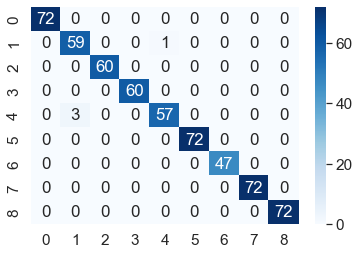

In [79]:
import seaborn as sns
sns.set(font_scale=1.4)
sns.heatmap(cm, annot=True,fmt='d',cmap="Blues")

In [80]:
from sklearn.metrics import accuracy_score
print('Accuracy score: ',accuracy_score(test_classes,predicted_class))

Accuracy score:  0.9930434782608696


In [81]:
from sklearn.metrics import classification_report
print('Classification Report \n',classification_report(test_classes,predicted_class))

Classification Report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        72
           1       0.95      0.98      0.97        60
           2       1.00      1.00      1.00        60
           3       1.00      1.00      1.00        60
           4       0.98      0.95      0.97        60
           5       1.00      1.00      1.00        72
           6       1.00      1.00      1.00        47
           7       1.00      1.00      1.00        72
           8       1.00      1.00      1.00        72

    accuracy                           0.99       575
   macro avg       0.99      0.99      0.99       575
weighted avg       0.99      0.99      0.99       575



In [8]:
export_path_keras = "Final Thesis/Saved Model/Model_1_CNN"
model_path=export_path_keras
reload_model=load_model(model_path)
reload_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 111, 111, 64)      1792      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 55, 55, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 27, 27, 32)        18464     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 6, 6, 32)          9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 3, 3, 32)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 3, 3, 32)         

Two Taka


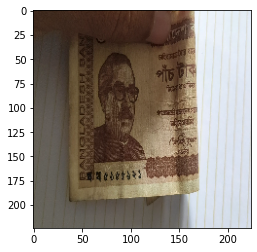

In [29]:
#""E:\video\Notes\five\new52.png""
random_image=image.load_img('E:/video/Notes/five/new1084.png',target_size=(224,224))
plt.imshow(random_image)
random_image=image.img_to_array(random_image)
test_image=random_image.reshape((1,)+random_image.shape)
test_image=test_image/255.0
#print(test_image.shape)
predicted_class=reload_model.predict(test_image)
#print(predicted_class)
#print('True classification')
noteclass(np.argmax(predicted_class))


Two Taka


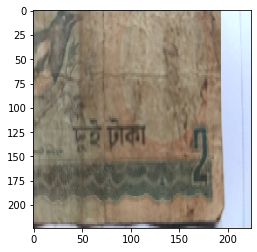

In [30]:

random_image=image.load_img('E:/AThesis/Final/testing_set/1.two/two1.png',target_size=(224,224))
plt.imshow(random_image)
random_image=image.img_to_array(random_image)
test_image=random_image.reshape((1,)+random_image.shape)
test_image=test_image/255.0
#print(test_image.shape)
predicted_class=reload_model.predict(test_image)
#print(predicted_class)
#print('True classification')
noteclass(np.argmax(predicted_class))

In [8]:
print(len(reload_model.weights))
print(reload_model.output_shape)

10
(None, 9)


In [106]:
reload_model.layers

In [107]:
t = time.time()

export_path_sm = "Final Thesis/Saved Model/Model_1_CNN {} Model {}".format(test_accuracy,int(t))
print(export_path_sm)

tf.saved_model.save(cnn, export_path_sm)

Final Thesis/Saved Model/Model_1_CNN 0.9930434823036194 Model 1647540630
INFO:tensorflow:Assets written to: Final Thesis/Saved Model/Model_1_CNN 0.9930434823036194 Model 1647540630\assets


In [108]:
reload_tf_saved_model=tf.saved_model.load(export_path_sm)

In [109]:
reload_tf_saved_model.signatures['serving_default']

<ConcreteFunction signature_wrapper(conv2d_3_input) at 0x1E38A3D2860>

In [110]:
reload_tf_saved_model

<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject at 0x1e38afc62b0>

In [111]:
model=reload_model

In [1]:
import os
import pyttsx3 
import numpy as np
import matplotlib.pyplot as plt
import random
import cv2
import PIL
import glob
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [3]:
export_path_keras = "Final Thesis/Saved Model/1.Model_CNN1.h5"

In [4]:
model_path=export_path_keras
reload_model=load_model(model_path)
reload_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 111, 111, 64)      1792      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 55, 55, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 27, 27, 32)        18464     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 6, 6, 32)          9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 3, 3, 32)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 3, 3, 32)         

In [7]:
def noteclass(cls):
    txt=pyttsx3.init()
    if cls==0:
        ans="Two Taka"
        print(ans)
        txt.say(ans)
        txt.runAndWait()
    elif cls==1:
        ans="Five Taka"
        print(ans)
        txt.say(ans)
        txt.runAndWait()
    elif cls==2:
        ans="Ten Taka"
        print(ans)
        txt.say(ans)
        txt.runAndWait()
    elif cls==3:
        ans="Twenty Taka"
        print(ans)
        txt.say(ans)
       # txt.runAndWait()
    elif cls==4:
        ans="Fifty Taka"
        print(ans)
        txt.say(ans)
        txt.runAndWait()
    elif cls==5:
        ans="One Hundred Taka"
        print(ans)
        txt.say(ans)
        txt.runAndWait()
    elif cls==6:
        ans="Two Hundred Taka"
        print(ans)
        txt.say(ans)
        txt.runAndWait()
    elif cls==7:
        ans="Five Hundred Taka"
        print(ans)
        txt.say(ans)
        txt.runAndWait()
    else:
        ans="One Thousand Taka"
        print(ans)
        txt.say(ans)
        txt.runAndWait()
    

One Thousand Taka


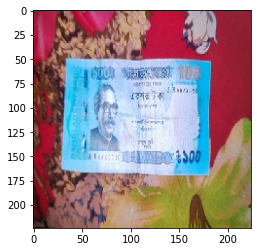

In [13]:
#""WIN_20220326_11_18_21_Pro"""
random_image=image.load_img('C:/Users/Niloy/Pictures/Camera Roll/100.png',target_size=(224,224))
plt.imshow(random_image)
random_image=image.img_to_array(random_image)
test_image=random_image.reshape((1,)+random_image.shape)
test_image=test_image/255.0
#print(test_image.shape)
predicted_class=reload_model.predict(test_image)
#print(predicted_class)
#print('True classification')
noteclass(np.argmax(predicted_class))

In [10]:
from PIL import Image
import matplotlib.pyplot as plt
import os, os.path

img = []
path = "C:/Users/Niloy/Pictures/Camera Roll"
valid_images =  [".jpg",".gif",".png",".tga"]
for f in os.listdir(path):
    ext = os.path.splitext(f)[1]
    if ext.lower() not in valid_images:
        continue
    img.append(Image.open(os.path.join(path,f)))
    break

random_image=img[0].copy()

random_image=cv2.resize(random_image,224*224)
plt.imshow(random_image)
random_image=image.img_to_array(random_image)
test_image=random_image.reshape((1,)+random_image.shape)
test_image=test_image/255.0
#print(test_image.shape)
predicted_class=reload_model.predict(test_image)
#print(predicted_class)
#print('True classification')
noteclass(np.argmax(predicted_class))

import os
path='C:\\Users\\Niloy\\Pictures\\Camera Roll\\'
for file in os.listdir(path):
    if file.endswith('.jpg'):
        os.unlink(path + file)

error: OpenCV(4.5.5) :-1: error: (-5:Bad argument) in function 'resize'
> Overload resolution failed:
>  - src is not a numpy array, neither a scalar
>  - Expected Ptr<cv::UMat> for argument 'src'
